In [4]:
import numpy as np
from matplotlib import rcParams, pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Lab

# Problem 1

In [38]:
# Load in the seeds_dataset 
data = np.genfromtxt('seeds_dataset.txt')
m,n =  data.shape


# Define training set and testing set
indices = np.random.choice(np.arange(m),size=40,replace=False)
training_set = [[],[],[]]
testing_set = []
for i in xrange(m):
    if i in indices:
        seed_type = int(data[i,-1]) - 1
        training_set[seed_type].append(data[i,:])
    else:
        testing_set.append(data[i,:])
testing_set = np.array(testing_set)


In [13]:
# Get means and variances for the training set.
# means[seed_type][i] is the mean for the ith feature given the seed type
means = [[],[],[]]
variances = [[],[],[]]
for seed_type in xrange(3):
    data_array = np.array(training_set[seed_type])
    for i in xrange(7):
        means[seed_type].append(np.mean(data_array[:,i]))
        variances[seed_type].append(np.std(data_array[:,i])**2.)

In [22]:
def calc_log_gauss_prob(x, mean, var):
    # uniform prior on the labels
    prob_seed = 1. / 3.
    tot = np.log(prob_seed)
    for i in xrange(len(x)):
        tot += np.log(1. / np.sqrt(2.*np.pi*var[i]))
        tot -= (x[i] - mean[i])**2. / (2. * var[i])
    return tot

def assign_seed_label(data):
    # data is vector of 7 features
    max_prob = -np.inf
    max_label = -1
    
    for seed_type in xrange(3):
        prob = calc_log_gauss_prob(data, means[seed_type], variances[seed_type])
        if prob > max_prob:
            max_label = seed_type
            max_prob = prob
    
    return max_label

# Compare the labelings from our method and testing set
act_labels = testing_set[:,-1]
test_labels = []
correct = 0.
total_tests  = testing_set.shape[0]
for test in xrange(total_tests):
    datum = testing_set[test,:7]
    label = assign_seed_label(datum) + 1
    test_labels.append(label)
    if label == act_labels[test]:
        correct += 1.
print 'These predictions were correct ' + str(100. * correct / total_tests) + ' percent of the time.'

These predictions were correct 89.4117647059 percent of the time.


# Problem 2

In [39]:
# We modify the format of how we were storing our training set to fit the specifications of NB classifier of sklearn
TRAINING = None
for i in xrange(len(training_set)):
    for j in xrange(len(training_set[i])):
        if i == 0 and j == 0:
            TRAINING = training_set[i][j].reshape(1, 8)
        else:
            TRAINING = np.vstack((TRAINING, training_set[i][j].reshape(1,8)))
training, labels = TRAINING[:,:7], TRAINING[:,-1]

In [50]:
# Create Gaussian Classifier for the data, fit, and predict
seed_classifier = GaussianNB()
seed_classifier.fit(training, labels)
prediction_labels = seed_classifier.predict(testing_set[:,:7])

# Now we check the accuracy of this classifier
correct = len(np.where(prediction_labels - testing_set[:,-1] == 0.)[0])
tot_tests = testing_set.shape[0]
print 'The SKLEARN classifiers predictions were correct ' + str(100. * correct / tot_tests) + ' percent of the time.'


The SKLEARN classifiers predictions were correct 87.0588235294 percent of the time.


# Problem 3

In [158]:
class naiveBayes(object):
    """
    this class performs Naive Bayes classification for word-count document features
    """
    def __init__(self):
        self.n_features = 0
        self.word_probs = None
        self.class_probs = None
        self.n_classes = 0
        
    def fit(self, X, Y):
        # Note -- we assume that the labels, Y[i], are in {0,1,...,n_features-1}
        
        n_samples, self.n_features = X.shape
        
        class_label_counts = {}
        for i in xrange(n_samples):
            if Y[i] not in class_label_counts.keys():
                class_label_counts[Y[i]] = 1.
            else:
                class_label_counts[Y[i]] += 1.
        
        # class_probs is the distribution for P(c_i), the probability of being in class i
        self.n_classes = len(class_label_counts.keys())
        self.class_probs = np.empty(self.n_classes)
        for _class, _count in class_label_counts.iteritems():
            self.class_probs[int(_class)] = _count / float(n_samples)
        
        # word probs will be the matrix built from the counts (n_labels, n_features)
        counts = np.zeros((self.n_classes, self.n_features))
        
        # iterate thru the training data, adding to the counts
        for i in xrange(n_samples):
            counts[int(Y[i]),:] += X[i,:]
         
        # calculate the probabilities for the matrix probs
        self.word_probs = counts + 1.  
        self.word_probs /= (np.sum(self.word_probs, axis=1)).reshape(counts.shape[0],1)
        
    
    def predict(self, X):
        def calc_log_prob(data, class_prior, word_probs):
            tot = np.log(class_prior)
            for i in xrange(len(data)):
                tot += data[i] * np.log(word_probs[i])
            return tot
        
        labels = []
        
        for j in xrange(X.shape[0]):
            max_label = -1
            max_prob = -np.inf
            datum = X[j,:]
            for i in xrange(self.n_classes):
                prob = calc_log_prob(datum, self.class_probs[i], self.word_probs[i,:])
                if prob > max_prob:
                    max_prob = prob
                    max_label = i
            labels.append(max_label)
        
        return np.array(labels)
                
    
    

# Problem 4

NEED TO FIX MY IMPLEMENTATION OF THE NAIVE BAYES IMMEADIATELY ABOVE... NOT WORKING

In [105]:
# Read in the spam features data
spam_features = np.genfromtxt('SpamFeatures.txt')
spam_labels = np.genfromtxt('SpamLabels.txt')


In [132]:
indices = np.random.choice(np.arange(spam_features.shape[0]),size=500, replace=False)

In [133]:
spam_training = []
spam_training_labels = []
spam_testing = []
spam_testing_labels = []
for i in xrange(spam_features.shape[0]):
    if i in indices:
        spam_training.append(spam_features[i,:])
        spam_training_labels.append(spam_labels[i])
    else:
        spam_testing.append(spam_features[i,:])
        spam_testing_labels.append(spam_labels[i])

spam_training = np.array(spam_training)
spam_training_labels = np.array(spam_training_labels)
spam_testing = np.array(spam_testing)
spam_testing_labels = np.array(spam_testing_labels)

In [159]:
spam_classifier = naiveBayes()
spam_classifier.fit(spam_training, spam_training_labels)

In [160]:
spam_predicted_labels = spam_classifier.predict(spam_testing)

In [161]:
# compare the predicted labels and the actual labels from the data set
correct = len(np.where(spam_predicted_labels - spam_testing_labels == 0.)[0])
tot_testing = spam_testing.shape[0]
print 'Our Naive Bayes was ' + str(100. * correct / tot_testing) + ' percent accurate'

Our Naive Bayes was 94.5205479452 percent accurate


In [162]:
# Now we perform the same task with sklearn's implementation
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(spam_training, spam_training_labels)
mnb_predicted_labels = mnb.predict(spam_testing)

In [163]:
# compare the sklearn's predicted labels and the actual labels from the data set
correct = len(np.where(mnb_predicted_labels - spam_testing_labels == 0.)[0])
tot_testing = spam_testing.shape[0]
print 'Our Naive Bayes was ' + str(100. * correct / tot_testing) + ' percent accurate'

Our Naive Bayes was 94.5205479452 percent accurate


# Logistic Regression Lab

In [1]:
import pandas as pd


# Problem 1

In [2]:
def initialize(pclass_change=True):
    titanic = pd.read_csv('titanic4real.csv')
    
    # Choose the columns we think will be relevant
    cols = ['Survived','Age', 'Sex', 'Pclass', 'Fare']
    all_cols = list(titanic.columns.values)
    for c in all_cols:
        if c not in cols:
            del titanic[c]
    
    # Change sex to binary values
    titanic = titanic.replace(to_replace=['male', 'female'], value=[1,0])
    
    # Drop the rows with Nan
    titanic = titanic.dropna()
    
    if pclass_change:
        titanic['1stclass'] = np.array([1 if titanic['Pclass'][i]== 1 else 0 for i in titanic.index ])
        titanic['2ndclass'] = np.array([1 if titanic['Pclass'][i] == 2 else 0 for i in titanic.index])
        del titanic['Pclass']
    # Split into training and testing data
    tot = len(titanic)
    train_ind = np.random.choice(np.arange(tot),size=int(.6*tot),replace=False)
    test_ind = list(set(np.arange(tot)) - set(train_ind))
    train_set = pd.DataFrame(titanic.loc[titanic.index[train_ind],:])
    test_set = pd.DataFrame(titanic.loc[titanic.index[test_ind], :])
    
    return train_set, test_set

In [5]:
train, test = initialize()

In [6]:
def best_tau(predicted_labels, true_labels, n_tau=100, plot=True):
    """
    Parameters
    -----------
    predicted_labels : ndarray of shape (n,)
        the predicted labels for the data
    true_labels : ndarray of shape (n,)
        the actual labels for the data
    n_tau : int
        the number of values to try for tau
    plot : boolean
        whether or not to plot the roc curve
    
    Returns
    -------
    best_tau : float
        the optimal value for tau for the data
    """
    taus = np.linspace(0,1,n_tau+2)[1:-1]
    TPRs = []
    FPRs = []
    best_TPR = 0
    best_FPR = 0
    best_score = -np.inf
    best_tau = -1.
    n = len(predicted_labels)
    
    for tau in taus:
        # Assuming that predicted labels are floats in [0,1]
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        p_labels = 1*(predicted_labels> tau)

        for i in xrange(n):
            p, t = p_labels[i], true_labels[i]
            if p == t:
                if p == 1:
                    TP += 1
                else:
                    TN += 1
            else:
                if p == 1:
                    FP += 1
                else:
                    FN += 1
        
        # calculate the true positive rate and false positivity rate
        TPR = float(TP)/float(TP + FN)
        TPRs.append(TPR)
        FPR = float(FP)/float(FP + TN)
        FPRs.append(FPR)
        score = TPR - FPR 
        if score > best_score:
            best_score = score
            best_tau = tau
            best_TPR = TPR
            best_FPR = FPR
    if plot:
        plt.plot(FPRs, TPRs, 'bo', FPRs, TPRs, 'k')
        plt.plot(best_FPR, best_TPR, 'g*',markersize=15, label='Best $tau$')
        plt.title('ROC Curve')
        plt.xlabel('$FPR$')
        plt.ylabel('$TPR$')
        plt.xlim(-0.1,1.1)
        plt.ylim(-0.1,1.1)
        plt.legend(loc='best')
        plt.show()
    
    return best_tau
    

In [7]:
# Test our function. We generate random sample of prediction and actual labels, where tau = 0.5
pred = np.random.rand(200)
actual = 1*(pred > 0.5)

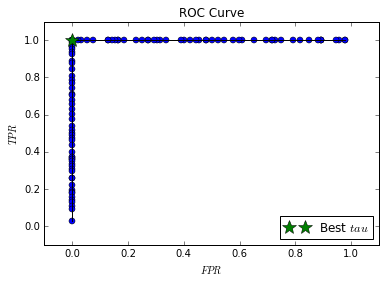

For our example, the best tau value is: 0.49504950495


In [8]:


# Plot our test
%matplotlib inline
tau = best_tau(pred, actual)
print 'For our example, the best tau value is: ' + str(tau)



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Problem 3

In [10]:
# Get the training and testing sets from our dataset
uc_train, uc_test = initialize(False)
c_train, c_test = initialize()
uc_train.head()

Pclass  Survived  Sex  Age      Fare
585       2         0    1   27   26.0000
155       1         1    0   52   93.5000
252       1         0    1   61  262.3750
904       3         0    1   23    7.8958
986       3         0    1   22    7.1250

In [11]:
# Split into data and labels for unchanged and changed
n = len(uc_train)
uc_train = uc_train.as_matrix()
uc_train_y = uc_train[:,1]
uc_train_X = np.hstack((uc_train[:,0].reshape(n,1), uc_train[:,2:].reshape(n,3)))

n = len(uc_test)
uc_test = uc_test.as_matrix()
uc_actual_labels = uc_test[:,1]
uc_test_X = np.hstack((uc_test[:,0].reshape(n,1), uc_test[:,2:].reshape(n,3)))

n = len(c_train)
c_train = c_train.as_matrix()
c_train_y = c_train[:,0]
c_train_X = c_train[:,1:]

n = len(c_test)
c_test = c_test.as_matrix()
c_actual_labels = c_test[:,0]
c_test_X = c_test[:,1:]

In [12]:
def auc_scores(unchanged_logreg, changed_logreg):
    """
    Parameters
    ----------
    unchanged_logreg : float in (0,1)
        the value to use for C in the unchanged model
    changed_logreg : float in (0,1)
        the value to use for C in the changed model
        
    Returns
    -------
    unchanged_auc : float
        the auc for the unchanged model
    changed_auc : float
        the auc for the changed model
    """
    # Create the unchanged and changed classifiers
    unchanged_classifier = LogisticRegression(C=unchanged_logreg)
    changed_classifier = LogisticRegression(C=changed_logreg)
    
    # Fit the data with the classifiers
    unchanged_classifier.fit(uc_train_X, uc_train_y)
    changed_classifier.fit(c_train_X, c_train_y)
    
    # Calculate the success probabilities for classifiers with the test data
    uc_success = unchanged_classifier.predict_proba(uc_test_X)[:,1]
    c_success = changed_classifier.predict_proba(c_test_X)[:,1]
    
    # Calculate the FPR and TPR scores 
    uc_fpr, uc_tpr, uc_thresholds = roc_curve(uc_actual_labels, uc_success, pos_label=1)
    c_fpr, c_tpr, c_thresholds = roc_curve(c_actual_labels, c_success, pos_label=1)
    
    # Calculate the Area Under the Curve for the scores
    unchanged_auc = auc(uc_fpr, uc_tpr)
    changed_auc = auc(c_fpr, c_tpr)
    
    return unchanged_auc, changed_auc

In [13]:
# Test our function above
unchanged_auc, changed_auc = auc_scores(unchanged_logreg=0.4, changed_logreg=0.8)
print "The AUC scores were: " + str(unchanged_auc) + ", " + str(changed_auc)

The AUC scores were: 0.863317316751, 0.860103134431


# Problem 4

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
# New function to calculate AUC scores, with Naive Bayes now
def auc_scores_new(unchanged_logreg, changed_logreg, unchanged_bayes, changed_bayes):
    """
    Parameters
    ----------
    unchanged_logreg : float in (0,1)
        the value to use for C in the unchanged model
    changed_logreg : float in (0,1)
        the value to use for C in the changed model
        
    Returns
    -------
    unchanged_auc : float
        the auc for the unchanged model
    changed_auc : float
        the auc for the changed model
    """
    # Create the unchanged and changed classifiers
    unchanged_classifier = LogisticRegression(C=unchanged_logreg)
    changed_classifier = LogisticRegression(C=changed_logreg)
    uc_b_classifier = MultinomialNB(alpha=unchanged_bayes)
    c_b_classifier = MultinomialNB(alpha=changed_bayes)
    
    
    # Fit the data with the classifiers
    unchanged_classifier.fit(uc_train_X, uc_train_y)
    changed_classifier.fit(c_train_X, c_train_y)
    uc_b_classifier.fit(uc_train_X, uc_train_y)
    c_b_classifier.fit(c_train_X, c_train_y)
    
    
    # Calculate the success probabilities for classifiers with the test data
    uc_success = unchanged_classifier.predict_proba(uc_test_X)[:,1]
    c_success = changed_classifier.predict_proba(c_test_X)[:,1]
    uc_b_success = uc_b_classifier.predict_proba(uc_test_X)[:,1]
    c_b_success = c_b_classifier.predict_proba(c_test_X)[:,1]
    
    # Calculate the FPR and TPR scores 
    uc_fpr, uc_tpr, uc_thresholds = roc_curve(uc_actual_labels, uc_success, pos_label=1)
    c_fpr, c_tpr, c_thresholds = roc_curve(c_actual_labels, c_success, pos_label=1)
    uc_b_fpr, uc_b_tpr, uc_b_thresholds = roc_curve(uc_actual_labels, uc_b_success, pos_label=1)
    c_b_fpr, c_b_tpr, c_b_thresholds = roc_curve(c_actual_labels, c_b_success, pos_label=1)
    
    
    # Calculate the Area Under the Curve for the scores
    unchanged_auc = auc(uc_fpr, uc_tpr)
    changed_auc = auc(c_fpr, c_tpr)
    uc_b_auc = auc(uc_b_fpr, uc_b_tpr)
    c_b_auc = auc(c_b_fpr, c_b_tpr)
    
    return unchanged_auc, changed_auc, uc_b_auc, c_b_auc

In [16]:
# Test our above function
auc_scores_new(0.4,0.8,0.7,0.8)

(0.86331731675146028,
 0.860103134431216,
 0.72787120783870363,
 0.69287802095957796)

# Problem 5

In [17]:
def find_best_parameters(choices):
    """
    Parameters
    ----------
    choices : int
        the number of values to try for C and alpha
    
    Returns
    -------
    best : list of length 4
        The best values for C for the unchanged and changed logistic regression models, 
        and the best values for alpha for the unchanged Naive Bayes models, respectively
    """
    vals = np.linspace(0,1,choices+2)[1:-1]
    max_uc_lrscore = -np.inf
    max_uc_lr_C = 0.
    max_c_lrscore = -np.inf
    max_c_lr_C = 0.
    max_uc_nbscore = -np.inf
    max_uc_nb_alpha = 0.
    max_c_nbscore = -np.inf
    max_c_nb_alpha = 0.
    
    for v in vals:
        uc_lr_auc, c_lr_auc, uc_nb_auc, c_nb_auc = auc_scores_new(v, v, v, v)
        if uc_lr_auc >= max_uc_lrscore:
            max_uc_lrscore = uc_lr_auc
            max_uc_lr_C = v
        if c_lr_auc >= max_c_lrscore:
            max_c_lrscore = c_lr_auc
            max_c_lr_C = v
        if uc_nb_auc >= max_uc_nbscore:
            max_uc_nbscore = uc_nb_auc
            max_uc_nb_alpha = v
        if c_nb_auc >= max_c_nbscore:
            max_c_nbscore = c_nb_auc
            max_c_nb_alpha = v
    
    return [max_uc_lr_C, max_c_lr_C, max_uc_nb_alpha, max_c_nb_alpha]

In [18]:
uc_C, c_C, uc_alpha, c_alpha = find_best_parameters(100)
print 'The max values for C and alpha are:'
print 'Unchanged LR: ' + str(uc_C)
print 'Changed LR: ' + str(c_C)
print 'Unchanged NB: ' + str(uc_alpha)
print 'Changed NB: ' + str(c_alpha)

The max values for C and alpha are:
Unchanged LR: 0.990099009901
Changed LR: 0.990099009901
Unchanged NB: 0.0693069306931
Changed NB: 0.990099009901


# Problem 6

Instead of writing a function we will just plot the roc curves

In [19]:
# Find ordering of methods via auc scores
uc_lr_auc, c_lr_auc, uc_nb_auc, c_nb_auc = auc_scores_new(uc_C, c_C, uc_alpha, c_alpha)
print uc_lr_auc
print c_lr_auc
print uc_nb_auc
print c_nb_auc

0.86626154136
0.860388298757
0.727977199925
0.692937430194


LR Changed


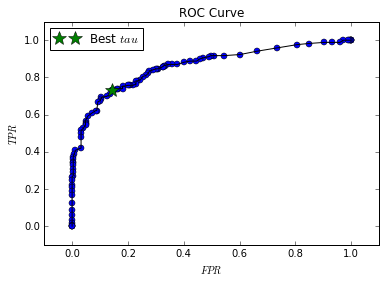

The AUC for LR changed:0.860388298757

LR Unchanged


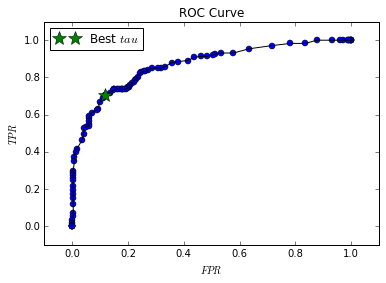

The AUC for LR unchanged: 0.86626154136

NB Unchanged


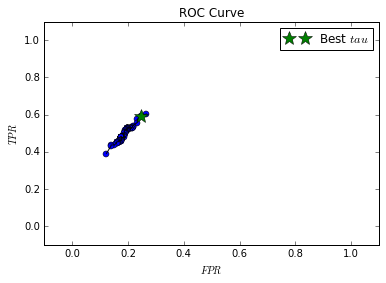

The AUC for NB unchanged: 0.727977199925

NB Changed


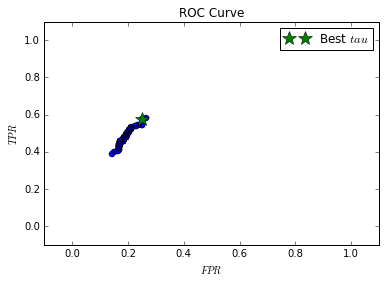

The AUC for NB changed: 0.692937430194


In [20]:
# Create the unchanged and changed classifiers
uc_lr_classifier = LogisticRegression(C=uc_C)
c_lr_classifier = LogisticRegression(C=c_C)
uc_nb_classifier = MultinomialNB(alpha=uc_alpha)
c_nb_classifier = MultinomialNB(alpha=c_alpha)


# Fit the data with the classifiers
uc_lr_classifier.fit(uc_train_X, uc_train_y)
c_lr_classifier.fit(c_train_X, c_train_y)
uc_nb_classifier.fit(uc_train_X, uc_train_y)
c_nb_classifier.fit(c_train_X, c_train_y)


# Calculate the success probabilities for classifiers with the test data
uc_lr_success = uc_lr_classifier.predict_proba(uc_test_X)[:,1]
c_lr_success = c_lr_classifier.predict_proba(c_test_X)[:,1]
uc_nb_success = uc_nb_classifier.predict_proba(uc_test_X)[:,1]
c_nb_success = c_nb_classifier.predict_proba(c_test_X)[:,1]


# Plot each of the roc curves
print 'LR Changed'
c_lr_t = best_tau(c_lr_success, c_actual_labels) 
print 'The AUC for LR changed:' + str(c_lr_auc)
print '\nLR Unchanged'
uc_lr_t = best_tau(uc_lr_success, uc_actual_labels)
print 'The AUC for LR unchanged: ' + str(uc_lr_auc)
print '\nNB Unchanged'
uc_nb_t = best_tau(uc_nb_success, uc_actual_labels)
print 'The AUC for NB unchanged: ' + str(uc_nb_auc)
print '\nNB Changed'
c_nb_t = best_tau(c_nb_success, c_actual_labels)
print 'The AUC for NB changed: ' + str(c_nb_auc)